어디에 cctv가 많이 설치되었는지부터 구별 인구 대비 비율을 확인

인구 현황을 보면서 구별 인구 현황에 대해 확인하고 구별 cctv 현황을 시각화

# 파이썬에서 텍스트파일과 엑셀 파일 읽기

pandas를 이용해 엑셀파일, csv파일을 읽는다

In [1]:
import pandas as pd

파이썬에서 원하는 모듈을 불러오는 명령은 import이고 그 뒤에 원하는 모듈명을 입력

모듈명 다음의 as는 as뒤에 붙는 pd라는 짧은 단어로 pandas를 대체한다

pd.read_csv

pandas에서 csv파일을 읽는 명령

한글파일을 사용하는 경우 인코딩에 신경써야한다

encoding = 'utf-8'이나 encoding = 'cp949'가 기본

# 1. csv 파일 읽기

In [2]:
CCTV_Seoul = pd.read_csv('/content/01. CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_Seoul.head() #데이터의 첫 5행을 보여주세요

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


데이터의 첫 줄은 column

In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

column의 이름은 rename으로 변경할 수 있다

inplace=True하면 실제 원본데이터 CCTV_Seoul에 갱신하라는 의미

In [5]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace=True)

#구별 cctv 현황
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


# 2. 엑셀 파일 읽기

In [6]:
#엑셀파일 읽기 오류 해결

#!pip install xlrd==1.2.0

In [7]:
pop_Seoul = pd.read_excel('/content/01. population_in_Seoul.xls')

pop_Seoul.head() #세줄이 열로 되어있는 이상한 상황

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_Seoul = pd.read_excel('/content/01. population_in_Seoul.xls', header = 2, usecols='B,D,G,J,N')

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
#칼럼명이 이상해서 rename으로 변경

pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace=True)

#구별 인구수 현황

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. 구별 인구수, cctv 데이터 정리

In [10]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [11]:
#CCTV 전체 개수로 정렬

#CCTV가 적은 순서로

CCTV_Seoul.sort_values(by='소계',ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


송파구의 CCTV 수가 적지만, 나중에 범죄율 분석을 할때(2장) 송파구의 범죄율은 낮은 구가 아니다

In [12]:
#CCTV가 많은 순서로 정렬

CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [13]:
# 최근 3년간 cctv 증가율 계산

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [14]:
#서울시 인구현황 분석

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [15]:
#0번행 합계는 필요없는 행이므로 drop을 이용하여 삭제

pop_Seoul.drop([0],inplace=True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


# unique 데이터 조사

혹시 중복해서 데이터가 나타났는지 확인

In [16]:
#unique조사

#구별에서 여러번 나타난 데이터는 없는지 확인

pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [17]:
#이상한 NaN이 나타났다는 것을 확인

#'구별'이 NaN인 행을 찾는다

pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [18]:
#26번 행은 의미 없는 행이므로 삭제

pop_Seoul.drop([26], inplace=True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [19]:
#외국인 비율과 고령자 비율 계산

pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] * 100

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [20]:
#인구수로 정렬

pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [21]:
#외국인 수로 정렬

pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [22]:
#외국인비율로 정렬

pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [23]:
#고령자로 정렬

pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [24]:
#고령자비율로 정렬

pop_Seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# cctv와 인구 현황 데이터를 합치고 분석

In [25]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [26]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [27]:
#두 데이터프레임의 공통 컬럼인 구별로 merge

data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')

data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# del 과 drop

drop은 행방향으로 삭제하고 del은 열을 삭제함

In [28]:
# 필요없는 컬럼 삭제

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# index 설정

set_index()함수를 사용하면 컬럼을 index로 바꿀 수 있음

In [29]:
#'구별'을 index로 설정

data_result.set_index('구별',inplace=True)

data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 상관분석

CCTV 수인 소계와 가장 상관계수가 큰 컬럼을 선택

상관계수의 절댓값이 클수록 두 변수는 서로 상관이 있다

0.1이하면 거의 무시, 0.3이하면 약한 상관관계, 0.7이하면 강한 상관관계

numpy의 corrcoef

In [30]:
import numpy as np

In [31]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [32]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [33]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

인구수와 CCTV수가 0.3정도로 가장 큰 상관관계를 보여서 조금 더 자세히 조사

In [34]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [35]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 인구수와 cctv 사이 관계를 시각화

In [36]:
#한글 글꼴 설치
#런타임 재시작 필수

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [37]:
#한글 글꼴 세팅

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

데이터 확인

In [38]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


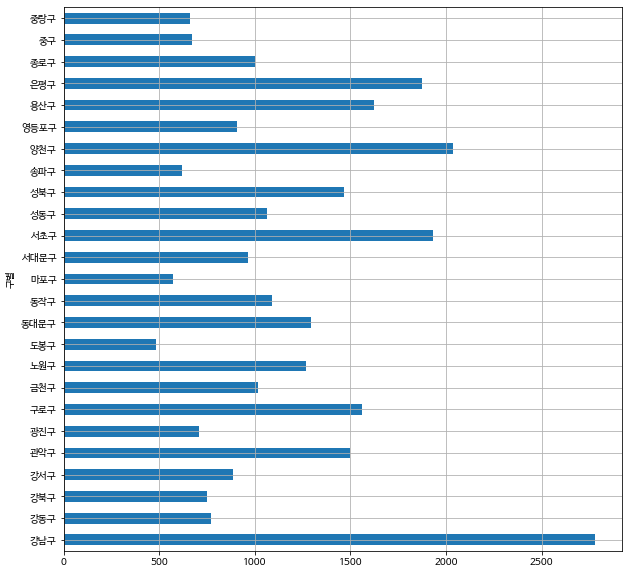

In [39]:
#pandas 뒤에 plot()명령 붙이면 바로 그려줌

data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10)) #barh하면 수평바 그래프

plt.show()

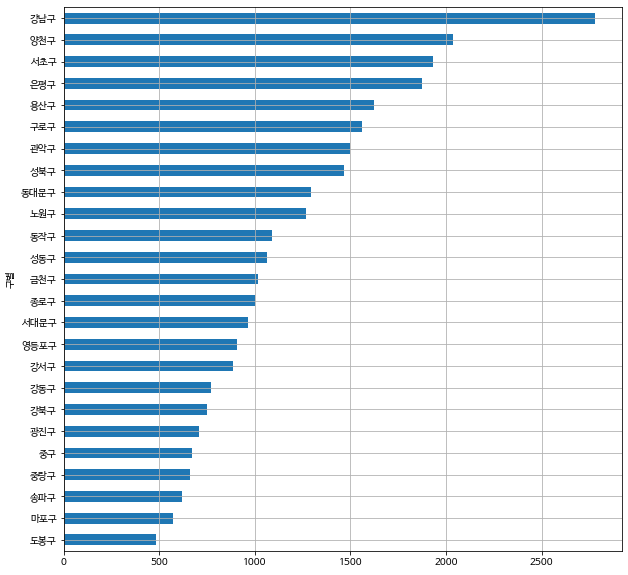

In [40]:
#데이터를 정렬시켜서 더욱 보기 좋게

data_result['소계'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

plt.show()

강남구가 cctv 개수가 월등하다

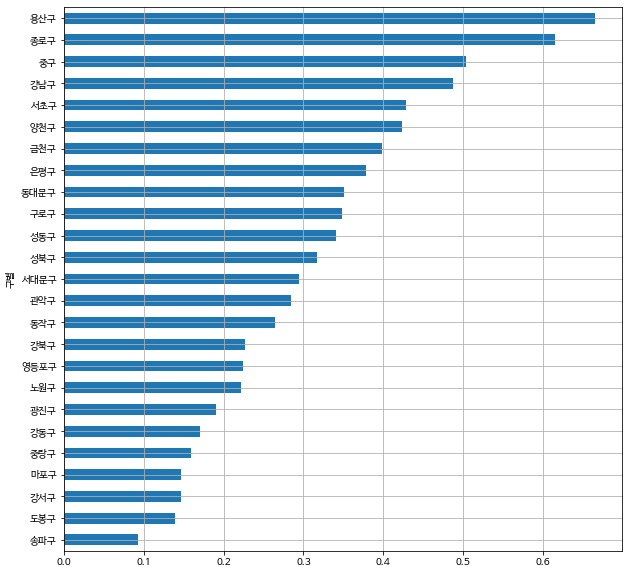

In [41]:
#인구대비 cctv 비율 시각화

data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100

data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

인구대비 cctv 비율은 용산구가 월등하게 높고 송파구는 인구 대비 cctv가 너무 적다

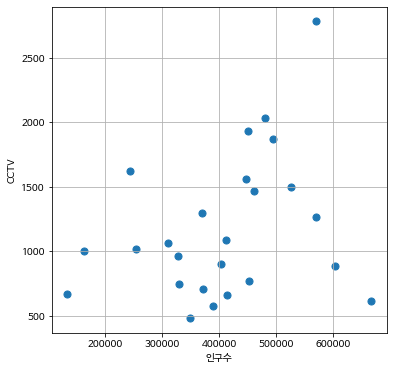

In [42]:
#scatter plot

plt.figure(figsize=(6,6))

plt.scatter(data_result['인구수'], data_result['소계'], s=50)

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()

In [43]:
#cctv와 인구수가 양의 상관관계가 있어서 scatter plot위에 직선을 그려보기

fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1) #x,y,차원
fp1

np.polyfit() #기울기, 절편

array([1.30916415e-03, 6.45066497e+02])

In [44]:
f1 = np.poly1d(fp1) #fp1의 함숫값

fx = np.linspace(100000,700000,100) #x축 값

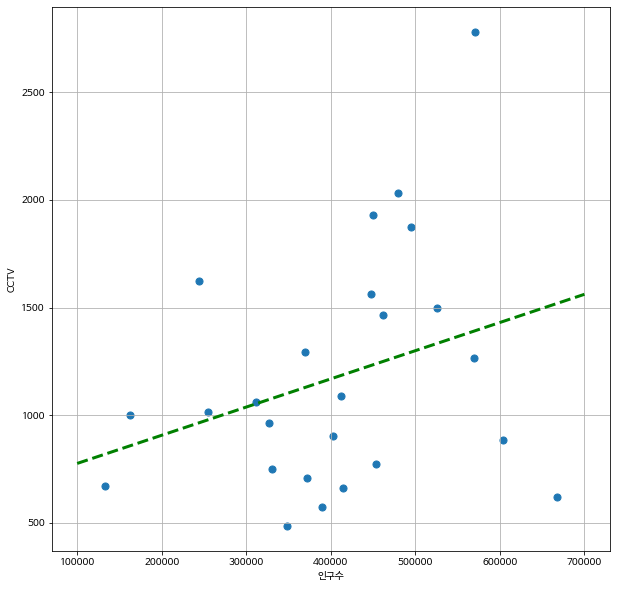

In [45]:
plt.figure(figsize=(10,10))

#scatter plot
plt.scatter(data_result['인구수'], data_result['소계'], s=50)

#직선
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()

회귀직선(초록색)의 경향에서 멀리 벗어나는 값은 이름이 나타나도록 하고

직선에서 멀어질수록 다른 색으로 표시

In [46]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


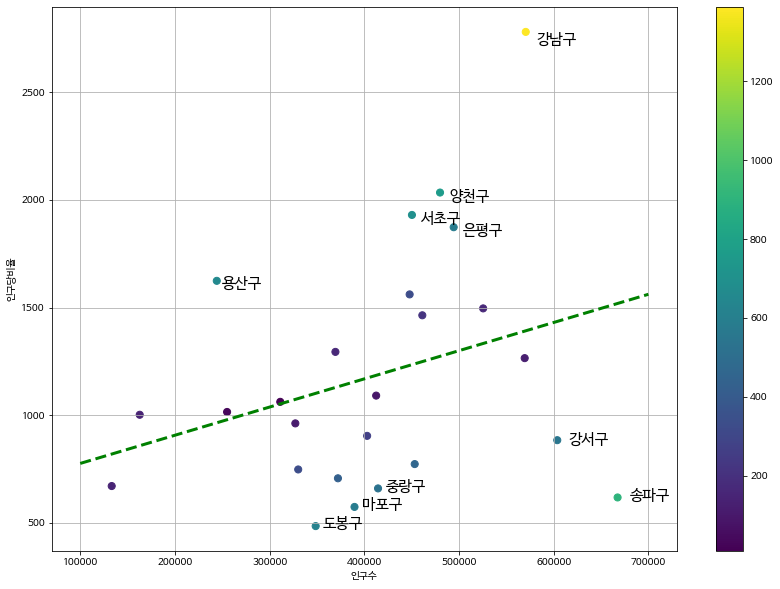

In [47]:
plt.figure(figsize=(14,10))

plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50) #오차에 따라 색을 입히고

plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g')

for n in range(10):
    
    #df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98에다가 오차 상위 10개에 크기 15로 이름 붙이는
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()



직선 위에 있는 강남구, 양천구, 서초구, 은평구, 용산구는 서울 전체 일반적인 경향보다 cctv가 많이 설치

직선 아래의 강서구, 송파구, 중랑구, 마포구, 도봉구는 cctv가 적게 설치

특히 강남구는 인구수 대비 월등히 많은 cctv를 가졌지만 강서구는 인구수 대비 cctv수가 너무 적다